In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../reddit_scrapper/src")
from apply_vader import get_vader_df

In [2]:
df = pd.read_csv('testdata/ver4/predict_0.5.csv')
file_name = 'predict_0.5_test.csv'
df.dropna(inplace=True)
df = df.drop_duplicates(['title'],keep='first') #중복 처리를 해준다.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123884 entries, 0 to 123909
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  123884 non-null  int64  
 1   title       123884 non-null  object 
 2   label       123884 non-null  object 
 3   vader       123884 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ MB


In [4]:
df.drop(df.columns[0],axis=1,inplace=True)

In [5]:
df['new_vader'] = get_vader_df(df,'title')['compound']

In [6]:
def make_compare_label(column_name):
    df['compare'] = np.where(df[column_name] >= 0.5,"pos",df[column_name])
    df['compare'] = np.where((df[column_name] > -0.5) & (df[column_name] < 0.5) ,"neu",df['compare'])
    df['compare'] = np.where(df[column_name] <= -0.5,"neg",df['compare'])

In [7]:
make_compare_label('new_vader')

In [8]:
df.loc[df['vader'] != df['new_vader']]

,title,label,vader,new_vader,compare
7,Aave Launches V in Bid to Make Borrowing Again...,neu,0.0498,-0.4228,neu
8,It is generally accepted that around million ...,neg,-0.4404,-0.5574,neg
18,Just in case this has not been posted here Imo...,pos,0.7178,0.6478,pos
19,Block Reuters Dec Dollar plummets on US stimu...,pos,-0.0258,0.5267,pos
49,Does holding half of your Bitcoin as BTC and t...,neu,0.0000,0.3612,neu
...,...,...,...,...,...
123888,ways to stop greed from losing you money,neg,-0.6486,-0.6124,neg
123901,Ripple Exec Says MoneyGram Launching XRP in Mu...,neu,0.0000,0.4588,neu
123904,Essential Things You Need To Know Before Enter...,pos,0.5994,0.6124,pos
123907,HODL tool by Torex,pos,0.0000,0.5766,pos


In [9]:
df.groupby(['label']).count()

,title,vader,new_vader,compare
label,,,,
neg,8824,8824,8824,8824
neu,94708,94708,94708,94708
pos,20352,20352,20352,20352


In [10]:
df.groupby(['compare']).count()

,title,label,vader,new_vader
compare,,,,
neg,8578,8578,8578,8578
neu,95554,95554,95554,95554
pos,19752,19752,19752,19752


In [11]:
differ = df[df['label'] != df['compare']]

In [12]:
differ.groupby(['label']).count()

,title,vader,new_vader,compare
label,,,,
neg,597,597,597,597
neu,807,807,807,807
pos,1066,1066,1066,1066


In [13]:
differ.groupby(['compare']).count()

,title,label,vader,new_vader
compare,,,,
neg,351,351,351,351
neu,1653,1653,1653,1653
pos,466,466,466,466


In [14]:
neu_dff = differ.loc[(abs(differ['vader']) > 0.5) & (differ['label'] == 'neu')]
neu_dff.sort_values(by=['vader'],inplace=True)

<ipython-input-14-164d006627ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu_dff.sort_values(by=['vader'],inplace=True)


In [15]:
neu_dff

,title,label,vader,new_vader,compare
97206,WARNING Youtube is actively sending people pus...,neu,-0.8636,-0.7896,neg
16304,Macro Expert Issues Apocalyptic Forecast Warns...,neu,-0.8402,-0.8402,neg
92846,SCAM WARNING dont fall for this in YouTube com...,neu,-0.8345,-0.7198,neg
111340,BITCOIN TRADER BRUTALLY TORTURED WITH DRILL IN...,neu,-0.8225,-0.8225,neg
51334,HORRIBLE misrepresentation of Ampleforth Write...,neu,-0.8038,-0.8038,neg
...,...,...,...,...,...
21320,WiN who is next after Micro strategy Square ...,neu,0.8225,0.8225,pos
2791,The AmpleSense Pioneer Fund Rewards for the Co...,neu,0.8374,0.8374,pos
101637,POSITIVE CRYPTO REGULATIONS WILL GENERATE WEAL...,neu,0.8506,0.8506,pos
13021,User asks rbinance helper why one of their URL...,neu,0.8647,0.8647,pos


In [16]:
neu_dff.to_csv(f'{file_name}')

In [17]:
most_differ = differ.loc[(differ['label'] != "neu") & (differ['compare'] != "neu")]

In [18]:
most_differ

,title,label,vader,new_vader,compare
6043,DONT USE CHANGELLY NOTHING BUT THIEVES WHO REP...,neg,0.5504,0.5504,pos
7677,LocalBitCoins Dumped FF Would It Be Possible T...,neg,0.6560,0.6207,pos
13290,Why HAVENT you bought VIDT,pos,0.0000,-0.6072,neg
29142,PIVX KILLER BUG,pos,-0.6486,-0.6486,neg
31742,Binance Venus vs Facebook LibraRound FIGHT Bi...,pos,-0.5160,-0.5160,neg
56890,People CANT MAKE rent of small businesses exp...,pos,-0.8468,-0.8345,neg
72258,Is mining btc a day enought if u have nowhere...,pos,-0.6072,-0.6072,neg
108255,Nothing but some great things for adoption can...,pos,-0.6642,-0.6642,neg
115501,CHAOS STOLEN Plus Chainlink gains and Polkado...,pos,-0.5812,-0.5812,neg
118714,a friendly reminder of all the shit the goldma...,neg,0.6703,0.6703,pos


In [19]:
most_differ.to_csv('most_differ.csv')

In [20]:
pos = df.loc[df['label'] == 'pos']
neg = df.loc[df['label'] == 'neg']

In [21]:
import matplotlib.pyplot as plt

(array([2.000e+00, 8.000e+00, 6.000e+00, 1.300e+01, 5.200e+01, 6.900e+01,
        4.680e+02, 6.656e+03, 9.799e+03, 3.279e+03]),
 array([-0.8345 , -0.65183, -0.46916, -0.28649, -0.10382,  0.07885,
         0.26152,  0.44419,  0.62686,  0.80953,  0.9922 ]),
 <BarContainer object of 10 artists>)

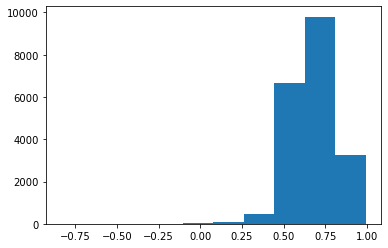

In [22]:
plt.hist(pos['new_vader'],bins=10)

(array([ 1302.,  4988.,  6642.,  5359., 58108.,  4882., 13456., 14172.,
        11180.,  3795.]),
 array([-0.9713 , -0.77495, -0.5786 , -0.38225, -0.1859 ,  0.01045,
         0.2068 ,  0.40315,  0.5995 ,  0.79585,  0.9922 ]),
 <BarContainer object of 10 artists>)

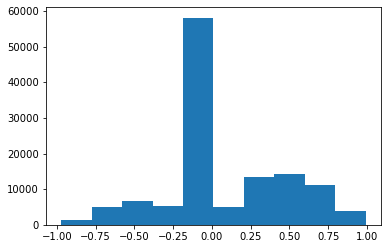

In [24]:
plt.hist(df['new_vader'],bins=10)


In [25]:
df.loc[df['label'] == 'neu']

,title,label,vader,new_vader,compare
0,Audio streaming giant Spotify is looking into ...,neu,0.0000,0.0000,neu
1,CashApp Owner Stripe will offer bank accounts ...,neu,0.4019,0.4019,neu
2,Altcoins combination,neu,0.0000,0.0000,neu
3,Bitcoin Core vs Bitcoin Cash Truce,neu,0.0000,0.0000,neu
5,Paul Tudor Jones Talks Bitcoin Its The Wrong M...,neu,-0.4767,-0.4767,neu
...,...,...,...,...,...
123902,Nano using calculus to understand price moment...,neu,0.0000,0.0000,neu
123903,Bitcoin Payments are Coming to Particls Open M...,neu,0.0000,0.0000,neu
123905,Trading without trusting the rd Decred Comic,neu,-0.3089,-0.3089,neu
123906,Grin coin receives another anonymous donation ...,neu,0.4767,0.4767,neu
